# Convolutional Neural Network for CIFAR-10

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

## Loading Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255, x_test/255
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f"x_train shape:{x_train.shape}\ny_train shape:{y_train.shape}")

x_train shape:(50000, 32, 32, 3)
y_train shape:(50000,)


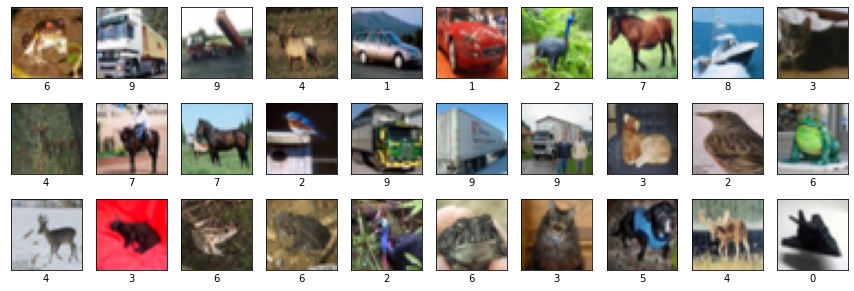

In [3]:
plt.figure(figsize=(15,5))

for index in range(30):
    plt.subplot(3, 10, index+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(y_train[index])
    plt.imshow(x_train[index])

## Model
***
Basic CNN wasn't giving good enough results (about 70% on validation data), so i've tried batch normalization and pooling. Inspiration from VGG. (Overkill?)

In [4]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(len(set(y_train)), activation='softmax')(x)

model = Model(i, x)

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

#### Compile And Fit
***
Data augumentation for less overfitting

In [6]:
%%time
batch_size = 32
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_gen = data_gen.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')
r = model.fit(train_gen, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 107s 69ms/step - loss: 1.4262 - accuracy: 0.5050 - val_loss: 1.0784 - val_accuracy: 0.6289
Epoch 2/50
1562/1562 [==============================] - 108s 69ms/step - loss: 0.9860 - accuracy: 0.6567 - val_loss: 0.8631 - val_accuracy: 0.6991
Epoch 3/50
1562/1562 [==============================] - 107s 69ms/step - loss: 0.8390 - accuracy: 0.7130 - val_loss: 0.8192 - val_accuracy: 0.7231
Epoch 4/50
1562/1562 [==============================] - 101s 65ms/step - loss: 0.7456 - accuracy: 0.7442 - val_loss: 0.8778 - val_accuracy: 0.7225
Epoch 5/50
1562/1562 [==============================] - 101s 65ms/step - loss: 0.6759 - accuracy: 0.7687 - val_loss: 0.9007 - val_accuracy: 0.7022
Epoch 6/50
1562/1562 [==============================] - 101s 65ms/step - loss: 0.6233 - accuracy: 0.7890 - val_loss: 0.6109 - val_accuracy: 0.7952
Epoch 7/50
1562/1562 [==============================] - 102s 65ms/step - loss: 0.5824 - accuracy: 0.8037 - val_loss: 0

## Analysing Results

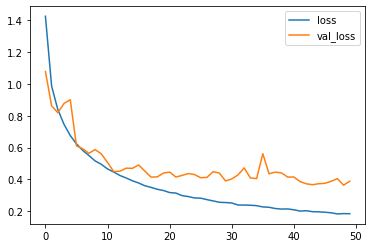

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

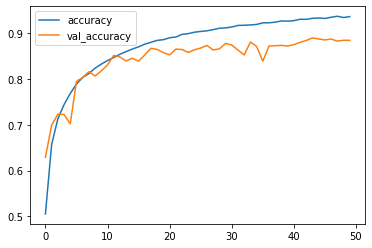

In [8]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

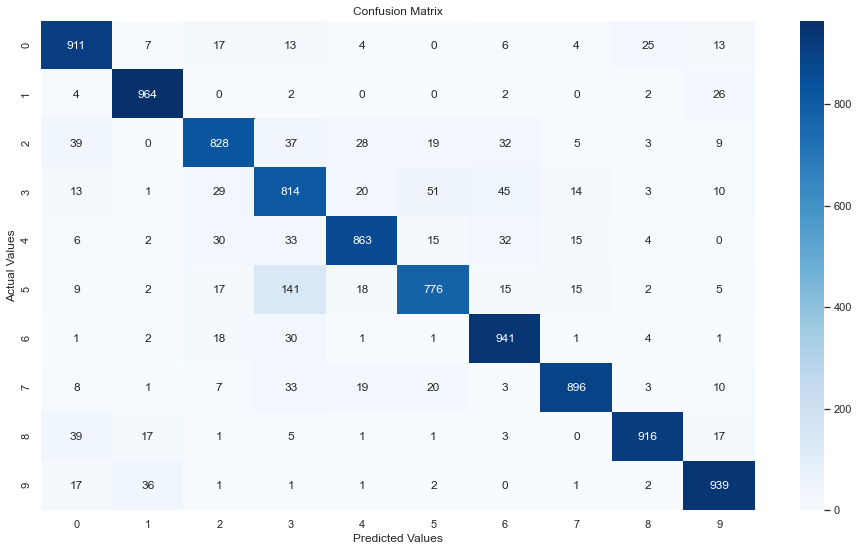

In [9]:
p_test = model.predict(x_test).argmax(axis=1)
cf_matrix = confusion_matrix(y_test, p_test)

sns.set(rc = {'figure.figsize':(16,9)})

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(range(10))
ax.yaxis.set_ticklabels(range(10))

plt.show()

0 - Airplane<br />
1 - Automobile<br />
2 - Bird<br />
3 - Cat<br />
4 - Deer<br />
5 - Dog<br />
6 - Frog<br />
7 - Horse<br />
8 - Ship<br />
9 - Truck<br />